In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import sem
from statistics import mean, stdev
import scipy.stats as stats

In [3]:
control = pd.read_csv (r'./Ezri Holding breath.txt', sep = '\t')
control

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
3028,30.28,-0.269747
3029,30.29,-0.423246
3030,30.30,-0.402351
3031,30.31,-0.229597


In [4]:
dive = pd.read_csv (r'./Ezri Ice water.txt', sep = '\t')
dive

,Time,Lead II
0,0.00,0.000000
1,0.01,0.000000
2,0.02,0.000000
3,0.03,0.000000
4,0.04,0.000000
...,...,...
2619,26.19,0.213774
2620,26.20,0.175212
2621,26.21,0.028484
2622,26.22,0.042073


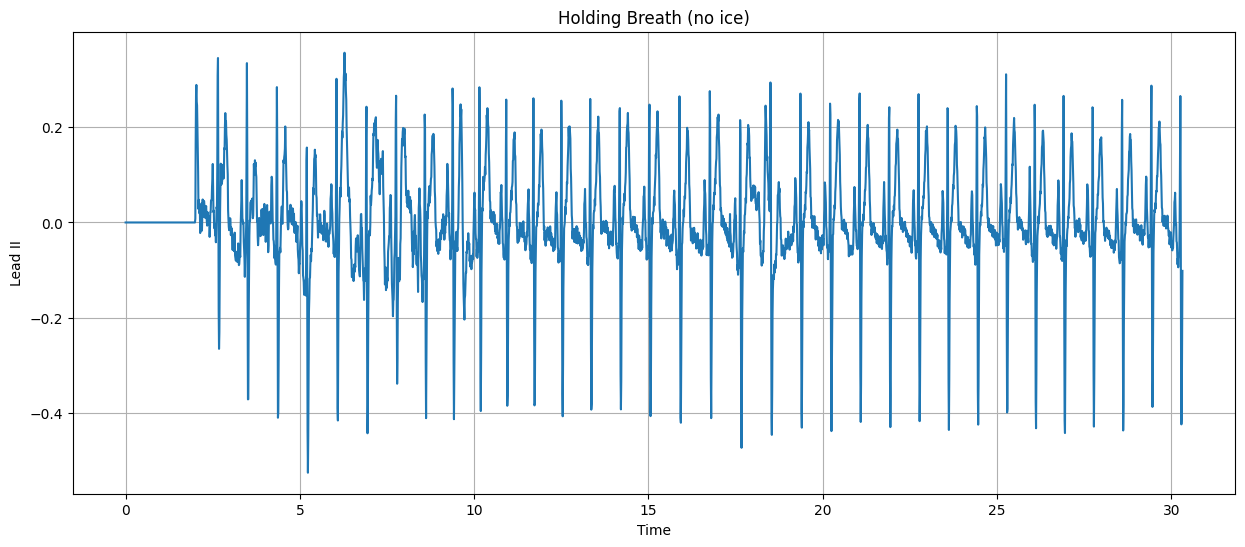

In [5]:
df = pd.DataFrame(control)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Holding Breath (no ice)')
plt.grid(True)
plt.show()


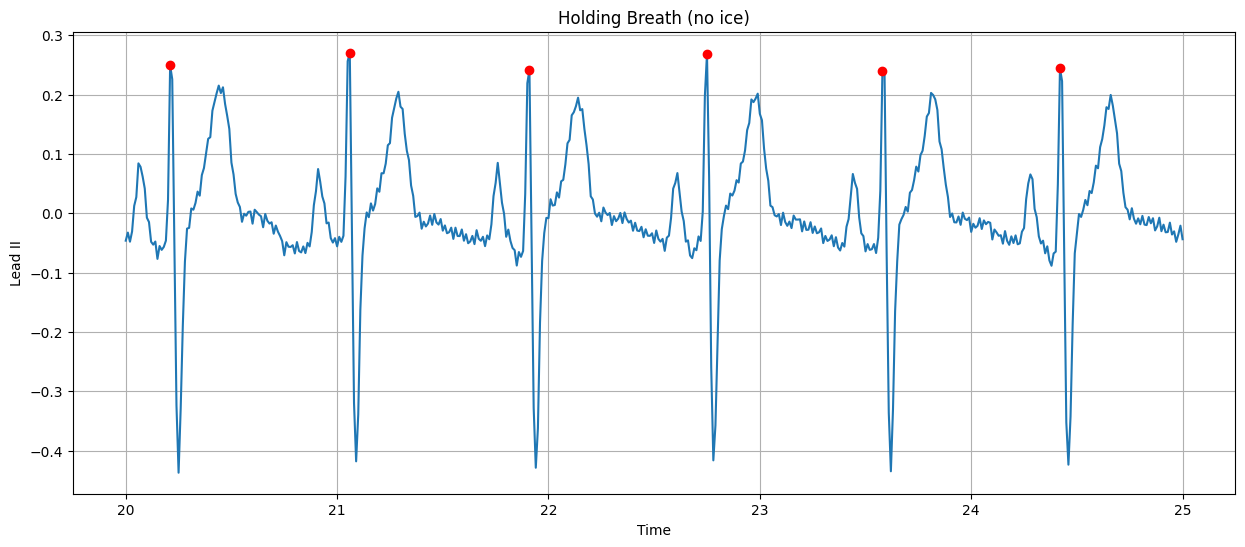

In [8]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 20) & (df['Time'] <= 25)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.22)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df['Time'], windowed_df['Lead II'])
plt.plot(windowed_df['Time'].iloc[windowed_peak_indices], windowed_df['Lead II'].iloc[windowed_peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Holding Breath (no ice)')
plt.grid(True)
plt.show()

In [9]:
# Filter the DataFrame for the specific time window
windowed_df = df[(df['Time'] >= 20) & (df['Time'] <= 25)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices, _ = find_peaks(windowed_df['Lead II'], height=.22)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Calculate RR intervals for this window
windowed_rr_intervals = windowed_df['Time'].iloc[windowed_peak_indices].diff().dropna().values

# Calculate heart rate in BPM for this window
average_windowed_rr_interval = windowed_rr_intervals.mean()
windowed_heart_rate = 60 / average_windowed_rr_interval

print(f"Average RR interval in the window: {average_windowed_rr_interval:.2f} seconds")
print(f"Heart rate in the window: {windowed_heart_rate:.2f} BPM")

Average RR interval in the window: 0.84 seconds
Heart rate in the window: 71.26 BPM


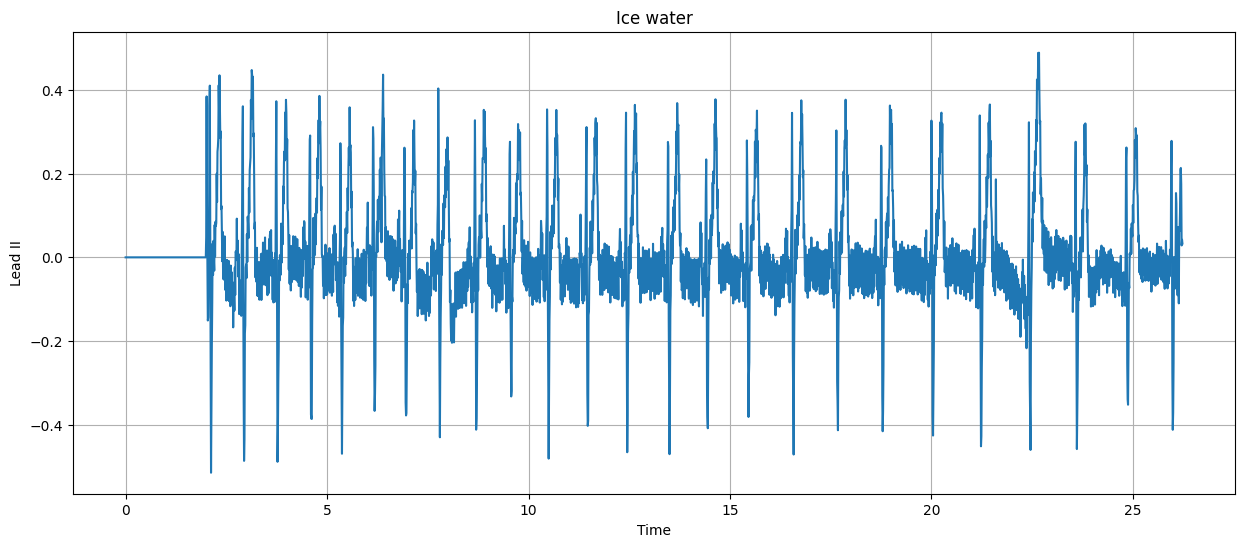

In [10]:
df2 = pd.DataFrame(dive)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df2['Time'], df2['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Ice water')
plt.grid(True)
plt.show()

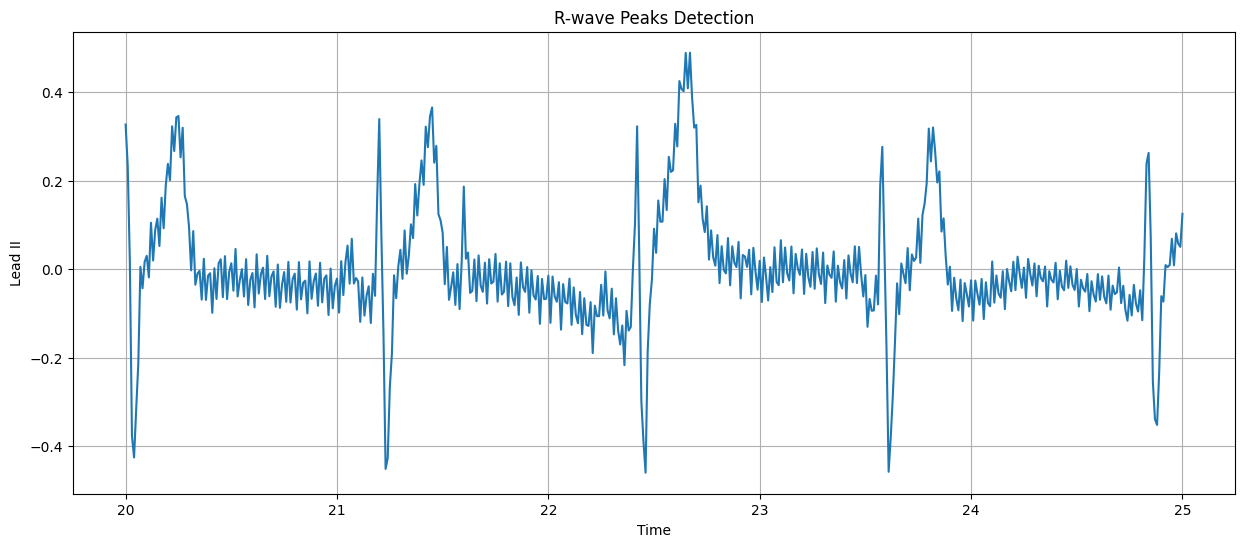

In [29]:
# Filter the DataFrame for the specific time window
windowed_df2 = df2[(df2['Time'] >= 20) & (df2['Time'] <= 25)]

# Assuming you have a method to detect peaks, identify R-peaks in this window
# (You might need to adjust this depending on your peak detection method)
windowed_peak_indices2, _ = find_peaks(windowed_df2['Lead II'], height=.5)  # Replace 'detect_peaks' and 'ECG_Data' accordingly

# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(windowed_df2['Time'], windowed_df2['Lead II'])
plt.plot(windowed_df2['Time'].iloc[windowed_peak_indices2], windowed_df2['Lead II'].iloc[windowed_peak_indices2], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()